In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the labeled dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/FYP/resume_jd_labeled_buckets.csv"
df = pd.read_csv(file_path)

In [ ]:
# Preview
print(df.head())

                                              Resume  \
0  database administrator family private care llc...   
1  database administrator family private care llc...   
2  database administrator family private care llc...   
3  database administrator database administrator ...   
4  database administrator database administrator ...   

                                     Job_Description  \
0  database administrator a database analyst exam...   
1  database administrator a database analyst exam...   
2  java developer java backend developers special...   
3  database administrator a database developer de...   
4  database administrator a database developer de...   

                                Category           Type  Score  
0                 Database Administrator       positive  85.00  
1                 Database Administrator  semi-negative  60.00  
2  Database Administrator→Java Developer       negative  30.00  
3                 Database Administrator       positive  85.38  
4

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67158 entries, 0 to 67157
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Resume           67158 non-null  object 
 1   Job_Description  67158 non-null  object 
 2   Category         67158 non-null  object 
 3   Type             67158 non-null  object 
 4   Score            67158 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.6+ MB
None


**Score Distribution**

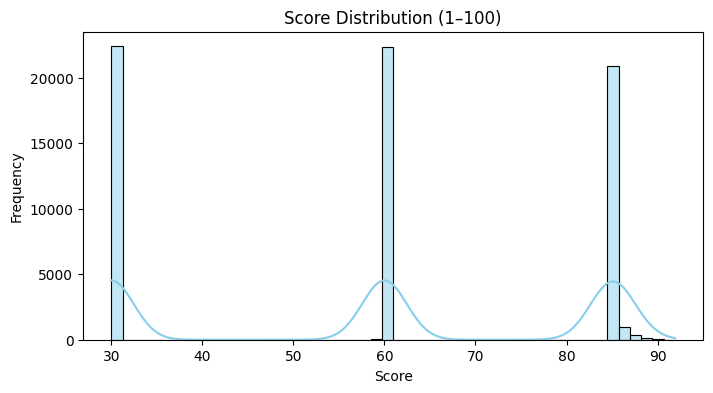

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Score'], bins=50, kde=True, color='skyblue')
plt.title("Score Distribution (1–100)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

**Class Imbalance Check**

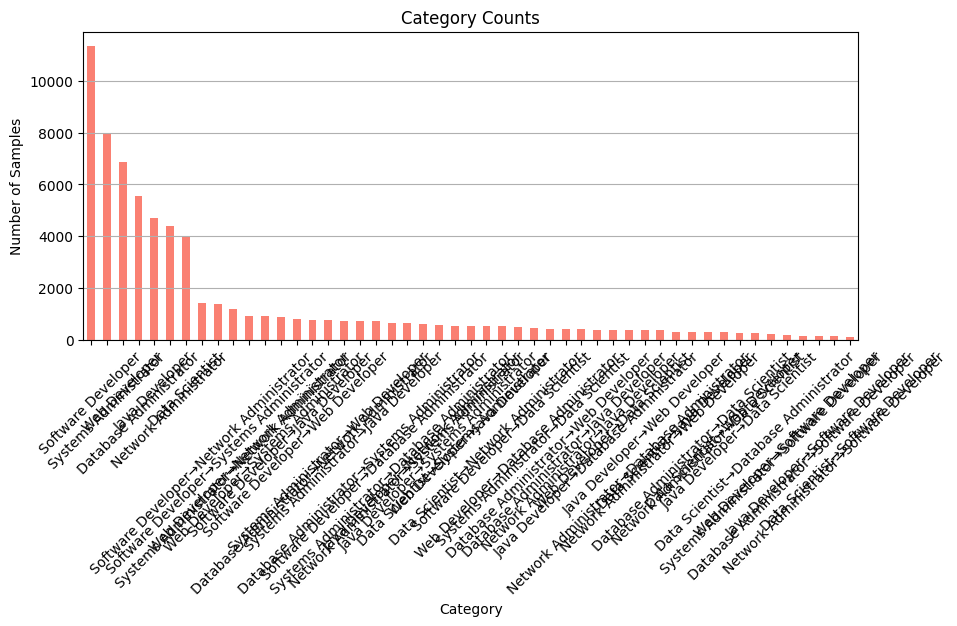

In [ ]:
plt.figure(figsize=(10, 4))
df['Category'].value_counts().plot(kind='bar', color='salmon')
plt.title("Category Counts")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Category Overlap Awareness

In [ ]:
# Show top most common overlaps (from "Type" column)
df['Type'].value_counts().head(20)

,count
Type,
positive,22386
semi-negative,22386
negative,22386


In [5]:
pip install transformers

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


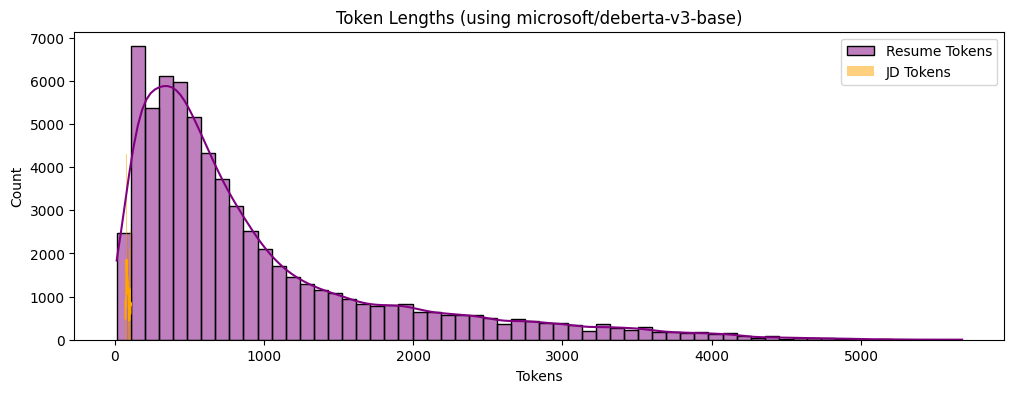

Resume Token Lengths:
 count    67158.000000
mean       938.829402
std        895.809614
min         14.000000
50%        615.000000
75%       1212.000000
90%       2285.000000
95%       2961.000000
99%       3982.580000
max       5677.000000
Name: resume_tokens, dtype: float64
JD Token Lengths:
 count    67158.000000
mean        88.913115
std          9.455761
min         73.000000
50%         88.000000
75%         96.000000
90%        103.000000
95%        106.000000
99%        107.000000
max        107.000000
Name: jd_tokens, dtype: float64


In [8]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns


# Load tokenizer
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Function to get token length
def get_token_len(text):
    return len(tokenizer.encode(str(text), truncation=False))

# Apply to both Resume and JD
df['resume_tokens'] = df['Resume'].apply(get_token_len)
df['jd_tokens'] = df['Job_Description'].apply(get_token_len)

# Plot histogram
plt.figure(figsize=(12, 4))
sns.histplot(df['resume_tokens'], bins=60, color='purple', label='Resume Tokens', kde=True)
sns.histplot(df['jd_tokens'], bins=60, color='orange', label='JD Tokens', kde=True)
plt.title(f"Token Lengths (using {model_name})")
plt.xlabel("Tokens")
plt.legend()
plt.show()

# Quantile stats (important for truncation decisions)
print("Resume Token Lengths:\n", df['resume_tokens'].describe(percentiles=[.5, .75, .9, .95, .99]))
print("JD Token Lengths:\n", df['jd_tokens'].describe(percentiles=[.5, .75, .9, .95, .99]))
